In [1]:
import pandas as pd
from numpy import nan
df = pd.read_csv(filepath_or_buffer='/kaggle/input/emoji-presentation-dataset/emojis.csv')
df['codepoint'] = df['CodePoint'].apply(func=lambda x: int(x, base=16) if x.startswith('1F') and len(x.split()) == 1 else nan) 
df['section'] = df['Section'].apply(func=lambda x: x if isinstance(x, float) else float(x.replace('E', '')))
df['group-subgroup'] = df['Group'] + '-' + df['Subgroup']
# let's map the name onto a number in a somewhat hacky way
df['name'] = df['Name'].apply(lambda x: ord(x[len(x)//2]) * ord(x[len(x)//2 - 1]))
df.head()

,Group,Subgroup,CodePoint,Status,Representation,Name,Section,codepoint,section,group-subgroup,name
0,Activities,event,1F383,fully-qualified,🎃,jack-o-lantern,E0.6,127875.0,0.6,Activities-event,4860
1,Activities,event,1F384,fully-qualified,🎄,Christmas tree,E0.6,127876.0,0.6,Activities-event,10573
2,Activities,event,1F386,fully-qualified,🎆,fireworks,E0.6,127878.0,0.6,Activities-event,12019
3,Activities,event,1F387,fully-qualified,🎇,sparkler,E0.6,127879.0,0.6,Activities-event,12198
4,Activities,event,1F9E8,fully-qualified,🧨,firecracker,E11.0,129512.0,11.0,Activities-event,11286


We would really like to get coordinates for each emoji that are natural, evenly spaced, and apply to every emoji.

<Axes: ylabel='Frequency'>

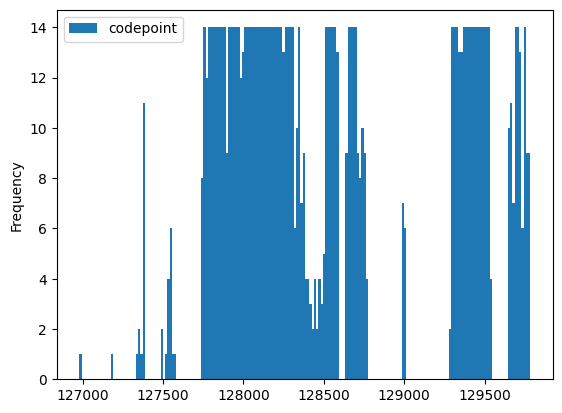

In [2]:
df['codepoint'].plot.hist(bins=200, legend=True)

In [3]:
round(df['codepoint'].isna().sum()/len(df), 3)

0.743

Obviously the codepoint is natural but it is not evenly spaced, and we only have about 74% coverage.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4733 entries, 0 to 4732
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Group           4733 non-null   object 
 1   Subgroup        4733 non-null   object 
 2   CodePoint       4733 non-null   object 
 3   Status          4733 non-null   object 
 4   Representation  4733 non-null   object 
 5   Name            4733 non-null   object 
 6   Section         4733 non-null   object 
 7   codepoint       1216 non-null   float64
 8   section         4733 non-null   float64
 9   group-subgroup  4733 non-null   object 
 10  name            4733 non-null   int64  
dtypes: float64(2), int64(1), object(8)
memory usage: 406.9+ KB


In [5]:
df.tail()

,Group,Subgroup,CodePoint,Status,Representation,Name,Section,codepoint,section,group-subgroup,name
4728,Travel-Places,sky-weather,2604 FE0F,fully-qualified,☄️,comet,E1.0,NaN,1.0,Travel-Places-sky-weather,12099
4729,Travel-Places,sky-weather,2604,unqualified,☄,comet,E1.0,NaN,1.0,Travel-Places-sky-weather,12099
4730,Travel-Places,sky-weather,1F525,fully-qualified,🔥,fire,E0.6,128293.0,0.6,Travel-Places-sky-weather,11970
4731,Travel-Places,sky-weather,1F4A7,fully-qualified,💧,droplet,E0.6,128167.0,0.6,Travel-Places-sky-weather,12432
4732,Travel-Places,sky-weather,1F30A,fully-qualified,🌊,water wave,E0.6,127754.0,0.6,Travel-Places-sky-weather,3648


<Axes: xlabel='Section'>

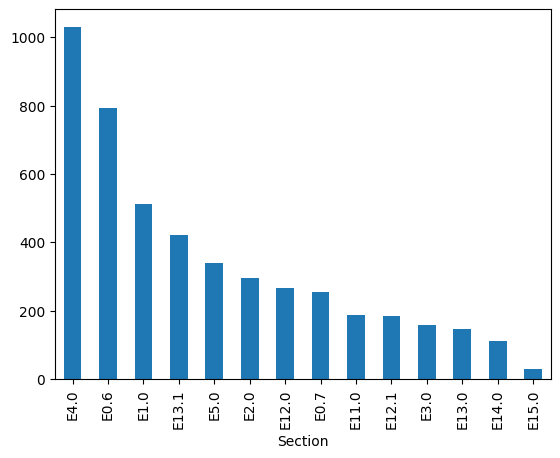

In [6]:
df['Section'].value_counts().plot(kind='bar')

In [7]:
df['Status'].value_counts()

Status
fully-qualified        3655
minimally-qualified     827
unqualified             242
component                 9
Name: count, dtype: int64

In [8]:
df[df['Status'] == 'fully-qualified'].head()

,Group,Subgroup,CodePoint,Status,Representation,Name,Section,codepoint,section,group-subgroup,name
0,Activities,event,1F383,fully-qualified,🎃,jack-o-lantern,E0.6,127875.0,0.6,Activities-event,4860
1,Activities,event,1F384,fully-qualified,🎄,Christmas tree,E0.6,127876.0,0.6,Activities-event,10573
2,Activities,event,1F386,fully-qualified,🎆,fireworks,E0.6,127878.0,0.6,Activities-event,12019
3,Activities,event,1F387,fully-qualified,🎇,sparkler,E0.6,127879.0,0.6,Activities-event,12198
4,Activities,event,1F9E8,fully-qualified,🧨,firecracker,E11.0,129512.0,11.0,Activities-event,11286


In [9]:
from plotly.express import scatter
scatter(data_frame=df.reset_index(), x='index', y='section', hover_name='Representation', color='Group', hover_data=['Name'])

Using Group to color gives us a manageable number of colors; using the index in the x direction gives us nice spread, but using the section is not surprisingly kind of clumpy.

In [10]:
scatter(data_frame=df.reset_index(), x='index', y='codepoint', hover_name='Representation', color='Group', hover_data=['Name'])

Index x codepoint is natural but again kind of clumpy in the y direction.

In [11]:
scatter(data_frame=df.reset_index(), x='index', y='codepoint', hover_name='Representation', color='Subgroup', hover_data=['Name'])

Using the Subgroup to color gives us too many colors.

In [12]:
scatter(data_frame=df.reset_index(), x='index', y='codepoint', hover_name='Representation', color='group-subgroup', hover_data=['Name'])

And combining the group and subgroup makes matters worse, obviously.

In [13]:
scatter(data_frame=df.reset_index(), x='index', y='name', hover_name='Representation', color='Group', hover_data=['Name'])

Index x name are two artificial (meaning not natural) coordinates, but they spread out the points reasonably well without being actually random.

In [14]:
scatter(data_frame=df.reset_index(), x='codepoint', y='name', hover_name='Representation', color='Group', hover_data=['Name'])

Codepoint x name is more natural but does not spread points as evenly.

Probably the thing we want most to do is to have the emojis themselves be the markers. Sadly this appears to be bleeding-edge functionality for both matplotlib and plotly at the moment.